# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation



### Import Libraries

In [15]:
# Import warnings

import warnings
warnings.filterwarnings (action = 'ignore')

In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd

!pip install matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandoc

,Requirement already satisfied: contourpy>=1.0.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (1.2.0)
,Requirement already satisfied: cycler>=0.10 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (0.11.0)
,Requirement already satisfied: fonttools>=4.22.0 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (4.51.0)
,Requirement already satisfied: kiwisolver>=1.3.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (1.4.4)
,Requirement already satisfied: numpy>=1.23 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (1.26.4)
,Requirement already satisfied: packaging>=20.0 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (24.1)
,Requirement already satisfied: pillow>=8 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (10.4.0)
,Requirement already satisfied: pyparsing>=2.3.1 in /opt/anaconda3/lib/python3.12/site-packages (from matplotlib) (3.1.2)
,Requirement already satisfied: pyth

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
,pandas version: 2.2.2
,matplotlib version: 3.10.0
,seaborn version: 0.13.2


### **1.1** Load the dataset


You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:


df = pd.read_parquet('2023-1.parquet')
df.info()
# iterrate through each file
for i in range(1,13,1):
    df = pd.read_parquet(f'2023-{i}.parquet')
    df.info()
    df.shape
        
        

<class 'pandas.core.frame.DataFrame'>
,Index: 3041714 entries, 0 to 3066765
,Data columns (total 19 columns):
, #   Column                 Dtype         
,---  ------                 -----         
, 0   VendorID               int64         
, 1   tpep_pickup_datetime   datetime64[us]
, 2   tpep_dropoff_datetime  datetime64[us]
, 3   passenger_count        float64       
, 4   trip_distance          float64       
, 5   RatecodeID             float64       
, 6   store_and_fwd_flag     object        
, 7   PULocationID           int64         
, 8   DOLocationID           int64         
, 9   payment_type           int64         
, 10  fare_amount            float64       
, 11  extra                  float64       
, 12  mta_tax                float64       
, 13  tip_amount             float64       
, 14  tolls_amount           float64       
, 15  improvement_surcharge  float64       
, 16  total_amount           float64       
, 17  congestion_surcharge   float64       
, 18  airp

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

**1.1.1** 
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [24]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#  read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

sampled_data = pd.DataFrame()
for i in range(1,13,1):
    df = pd.read_parquet(f'2023-{i}.parquet')
    
    dates = df['tpep_pickup_datetime'].dt.date.unique()
    for date in dates:
        df_data = df[df['tpep_pickup_datetime'].dt.date == date]
        
        for hour in range(24):
            # Filter data for this hour
            hour_data = df_data[df_data['tpep_pickup_datetime'].dt.hour == hour]
            
            # Only sample if hour_data is not empty
            if not hour_data.empty:
                # Sample 5% of the hour_data
                sampled = hour_data.sample(frac=0.05, random_state=42)
                
                # Append to the main sampled_data DataFrame
                sampled_data = pd.concat([sampled_data, sampled], ignore_index=True)
sampled_data


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1.0,0.81,1.0,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,NaN,0.0
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1.0,5.78,1.0,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,NaN,0.0
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1.0,1.06,1.0,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,NaN,0.0
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,NaN,0.00,NaN,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,NaN,NaN,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [28]:
# Store the df in csv/parquet
sampled_data.to_parquet('2023_sampled.parquet')

## **2** Data Cleaning


Now we can load the new data directly.

In [31]:
# Load the new data file

df1_0 = pd.read_parquet('2023_sampled.parquet')
df1_0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1.0,0.81,1.0,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,NaN,0.0
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1.0,5.78,1.0,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,NaN,0.0
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1.0,1.06,1.0,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,NaN,0.0
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,NaN,0.00,NaN,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,NaN,NaN,NaN


In [32]:
# df.head()
df1_0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [33]:
# df.info()
df1_0.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 1896400 entries, 0 to 1896399
,Data columns (total 20 columns):
, #   Column                 Dtype         
,---  ------                 -----         
, 0   VendorID               int64         
, 1   tpep_pickup_datetime   datetime64[us]
, 2   tpep_dropoff_datetime  datetime64[us]
, 3   passenger_count        float64       
, 4   trip_distance          float64       
, 5   RatecodeID             float64       
, 6   store_and_fwd_flag     object        
, 7   PULocationID           int64         
, 8   DOLocationID           int64         
, 9   payment_type           int64         
, 10  fare_amount            float64       
, 11  extra                  float64       
, 12  mta_tax                float64       
, 13  tip_amount             float64       
, 14  tolls_amount           float64       
, 15  improvement_surcharge  float64       
, 16  total_amount           float64       
, 17  congestion_surcharge   float64       
, 18 

#### **2.1** Fixing Columns

Fix/drop any columns as you seem necessary in the below sections

**2.1.1**

Fix the index and drop unnecessary columns

In [36]:
# Fix the index and drop any columns that are not needed
# 1. It will appropriate to change the data type for  'RatecodeID' and 'passenger_count' from 'Float' to 'Int64'.

df1_0['passenger_count'] = df1_0['passenger_count'].astype('Int64')
df1_0['RatecodeID'] = df1_0['RatecodeID'].astype('Int64')

# 2. Reset index
df1_0 = df1_0.reset_index(drop=True)
df1_0.info()


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 1896400 entries, 0 to 1896399
,Data columns (total 20 columns):
, #   Column                 Dtype         
,---  ------                 -----         
, 0   VendorID               int64         
, 1   tpep_pickup_datetime   datetime64[us]
, 2   tpep_dropoff_datetime  datetime64[us]
, 3   passenger_count        Int64         
, 4   trip_distance          float64       
, 5   RatecodeID             Int64         
, 6   store_and_fwd_flag     object        
, 7   PULocationID           int64         
, 8   DOLocationID           int64         
, 9   payment_type           int64         
, 10  fare_amount            float64       
, 11  extra                  float64       
, 12  mta_tax                float64       
, 13  tip_amount             float64       
, 14  tolls_amount           float64       
, 15  improvement_surcharge  float64       
, 16  total_amount           float64       
, 17  congestion_surcharge   float64       
, 18 

**2.1.2** 
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [38]:
# Combine the two airport fee columns

# 1. There are two airport fee columns. Upon analysis, found that -
#        1.1 if 'airport_fee' is not null then 'Airport_fee' is null and vice-a-versa.
#        1.2 we can combine both the columns for non-null values using combine_first() command.

df1_0['Airport_Fee'] = df1_0['airport_fee'].combine_first(df1_0['Airport_fee'])
df1_0.drop(['airport_fee','Airport_fee'], axis = 1,inplace=True)
df1_0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,<NA>,0.00,<NA>,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,NaN,NaN


**2.1.3** 
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
# ANS - There are no negative values in 'fare_amount' column

df1_neg_fare_amount = df1_0[df1_0.fare_amount < 0]
df1_neg_fare_amount

Did you notice something different in the `RatecodeID` column for above records?

In [42]:
# Analyse RatecodeID for the negative fare amounts
# ANS - There are no negative values in 'RatecodeID' column

df1_neg_RatecodeID = df1_0[df1_0.RatecodeID < 0]
df1_neg_RatecodeID


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee


In [43]:
# Find which columns have negative values

# Columns(n=counts) with negative values are - extra (n=3),mta_tax(n=73),improvement_surcharge(n=78),total_amount(n=78),congestion_surcharge(n=56),Airport_Fee(N=15) 

print('Distribution of Negative Values in columns')
column_with_neg_values = (df1_0[['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_Fee']] < 0).sum()
column_with_neg_values



Distribution of Negative Values in columns


VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     3
mta_tax                  73
tip_amount                0
tolls_amount              0
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
Airport_Fee              15
dtype: Int64

In [44]:
# fix these negative values
#Set negatives to zero (e.g., for features like extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge and Airport_Fee can’t logically be negative)

df1_0.loc[df1_0['extra'] < 0, 'extra'] = 0.0
df1_0.loc[df1_0['mta_tax'] < 0, 'mta_tax'] = 0.0
df1_0.loc[df1_0['improvement_surcharge'] < 0, 'improvement_surcharge'] = 0.0
df1_0.loc[df1_0['total_amount'] < 0, 'total_amount'] = 0.0
df1_0.loc[df1_0['congestion_surcharge'] < 0, 'congestion_surcharge'] = 0.0
df1_0.loc[df1_0['Airport_Fee'] < 0, 'Airport_Fee'] = 0.0



### checking for negative values in columns - There are no negatives left in the 
(df1_0[['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_Fee']] < 0).sum()



VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_Fee              0
dtype: Int64

### **2.2** Handling Missing Values


**2.2.1** 
Find the proportion of missing values in each column




In [47]:
# Find the proportion of missing values in each column
### proportion of missing values is below:
print('Proportion of missing values is below:')
round(df1_0.isnull().sum()/df1_0.shape[0]*100,2)

Proportion of missing values is below:


VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
store_and_fwd_flag       3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
Airport_Fee              3.42
dtype: float64

**2.2.2**  
Handling missing values in `passenger_count`

In [49]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
## ANS -  Imputed the NaN values in 'passenger_count' with it's Median value

passenger_count_null = df1_0[df1_0.passenger_count.isnull()]
passenger_count_null

Median_passenger_count = df1_0.passenger_count.median()

df1_0['passenger_count'].fillna(Median_passenger_count, inplace = True)
df1_0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,<NA>,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,1,0.00,<NA>,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,NaN,NaN


In [50]:
#Did you find zeroes in passenger_count? Handle these.
# Dropping rows with passenger_count = 0
df1_1 = df1_0[~(df1_0.passenger_count == 0)]
df1_1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,<NA>,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,1,0.00,<NA>,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,NaN,NaN


**2.2.3** 
Handle missing values in `RatecodeID`

In [52]:
# Fix missing values in 'RatecodeID'
# ANS - Since there is a RatecodeID for unknown/null values. Hence assigned value for 99 for all the null values in the RatecodeID. 

df1_1.loc[df1_1.RatecodeID.isnull(),'RatecodeID' ] = 99
#df1.RatecodeID.isnull().sum()

**2.2.4**  
Impute NaN in `congestion_surcharge`

In [54]:
# handle null values in congestion_surcharge

median_congestion_surcharge = df1_1.congestion_surcharge.median()

df1_1.congestion_surcharge.fillna(median_congestion_surcharge, inplace = True)
df1_1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,99,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,1,0.00,99,None,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,2.5,NaN


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [56]:
# Handle any remaining missing values
#round(df1.isnull().sum()/df1.shape[0]*100,2)

''' 
Handle missing values in Airport_Fee columns - 

Observation 1 - Prior to assigning 99 to Null values in 'RatecodeID', if we filter the RatecodeID = 99, we will find that airport_fee is 0.0 for throughut. 
This means for Null/Unknown in 'RatecodeID', the value in airport_fee is 0.0 since 'RatecodeID' = 99 stands for 'Null/unknown' values.

Observation 2 - While handling Null values in 'RatecodeID' we had assigned a value of 99 to it. The corresponding airport_fee is null for the same set of rows.

Solution for handling missing values in Airport_Fee - Extrapolating the Observation 1 onto Observation 2. We can assign 0.0 for all the 'RatecodeID' = 99.

'''

df1_1.Airport_Fee.fillna(0.0, inplace = True)



'''

Handle missing values in 'store_and_fwd_flag' columns - 

Observation 1 - Prior to assigning 99 to Null values in 'RatecodeID', if we filter the RatecodeID = 99, we will find that mode()[0] of store_and_fwd_flag is 'N'. 

Observation 2 - While handling Null values in 'RatecodeID' we had assigned a value of 99 to it. The corresponding store_and_fwd_flag is null for the same set of rows.

Solution for handling missing values in store_and_fwd_flag - Extrapolating the Observation 1 onto Observation 2. We can assign 'N' for all the 'RatecodeID' = 99.


'''

mode_store_and_fwd_flag = df1_1[df1_1.RatecodeID == 99].store_and_fwd_flag.mode()[0]
df1_1.loc[df1_1.RatecodeID == 99,'store_and_fwd_flag'] = mode_store_and_fwd_flag


# There is no null value left.
df1_1.isnull().sum()




VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_Fee              0
dtype: int64

### **2.3** Handling Outliers


Before we start fixing outliers, let's perform outlier analysis.

In [59]:
# Describe the data and check if there are any potential outliers present
df1_1.describe()

# Check for potential out of place values in various columns

columns = ['passenger_count', 'trip_distance','fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_Fee']

outlier_summary = {}

for col in columns:
    Q1 = df1_1[col].quantile(0.25)
    Q3 = df1_1[col].quantile(0.75)
    lower_bound = Q1 - 1.5*(Q3-Q1)
    upper_bound = Q3 + 1.5*(Q3+Q1)
    outlier_count = df1_1[(df1_1[col] < lower_bound) | (df1_1[col] > upper_bound)].shape[0]
    outlier_summary[col] = {'Lower_Bound' : lower_bound,'Upper_Bound':upper_bound, 'Outlier_count':outlier_count }

#outlier_summary
df1_1_outlier = pd.DataFrame(outlier_summary).T
df1_1_outlier



,Lower_Bound,Upper_Bound,Outlier_count
passenger_count,1.000,4.000,39752.0
trip_distance,-2.490,10.100,158712.0
fare_amount,-10.170,69.650,96566.0
extra,-3.750,6.250,32941.0
mta_tax,0.500,2.000,17598.0
tip_amount,-4.175,12.625,83470.0
tolls_amount,0.000,0.000,152213.0
improvement_surcharge,1.000,4.000,2195.0
total_amount,-6.600,101.440,24529.0
congestion_surcharge,2.500,10.000,138790.0


**2.3.1**  
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [63]:
# remove passenger_count > 6
df1_2 = df1_1[~(df1_1.passenger_count > 6)]
df1_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,99,N,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,1,0.00,99,N,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,2.5,0.00


In [64]:
# Continue with outlier handling


# Removing entries where trip_distance is nearly 0 and fare_amount is more than upper bound (69.650) from above table
df1_3 = df1_2[~((df1_2.trip_distance == 0) & (df1_2.fare_amount > 69.650))]


# Removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df1_4 = df1_3[ ~((df1_3.trip_distance == 0) & (df1_3.fare_amount == 0) & (df1_3.PULocationID != df1_3.DOLocationID)) ]


# Removing entries where trip_distance is more than 250 miles.
df1_5 = df1_4[~(df1_4.trip_distance > 250)]


# Removing enteries where pickup_datetime and dropoff_datetime is same but PULocationID and DOLocationID are different

df1_6 = df1_5[~((df1_5.tpep_pickup_datetime == df1_5.tpep_dropoff_datetime) & (df1_5.PULocationID!= df1_5.DOLocationID))]

df1_6


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1,19.24,99,N,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896396,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.50,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1896397,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.20,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1896398,1,2023-12-31 23:12:30,2023-12-31 23:21:12,1,0.00,99,N,166,244,0,14.64,0.0,0.5,0.00,0.0,1.0,16.14,2.5,0.00


In [65]:
# Do any columns need standardising?

## VendorID should be 1, 2 as per data dictionary. Hence, removed VendorId other than 1,2
df1_7 = df1_6[df1_6.VendorID.isin([1,2])]


## RatecodeID should be 1,2,3,4,5,6 as per data dicstionary. Hence, remove any other values
df1_8 = df1_7[df1_7.RatecodeID.isin([1,2,3,4,5,6])]

## payment_type should be 1,2,3,4,5,6 as per data dicstionary. Hence, remove any other values
df1_9 = df1_8[df1_8.payment_type.isin([1,2,3,4,5,6])].reset_index(drop=True)
df1_9




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,2,32.4,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,2,11.4,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,2,6.5,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,7.10,1,N,246,37,1,34.5,3.5,0.5,7.90,0.0,1.0,47.40,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786768,2,2023-12-31 23:38:35,2024-01-01 00:05:50,5,9.29,1,N,48,25,1,41.5,1.0,0.5,9.30,0.0,1.0,55.80,2.5,0.00
1786769,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
1786770,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.5,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00
1786771,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1,1.06,1,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


## **3** Exploratory Data Analysis


In [67]:
df1_9.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends


**3.1.1** 
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?  Ans - These parameters are numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`



##### Temporal Analysis

**3.1.2** 
Analyse the distribution of taxi pickups by hours, days of the week, and months.

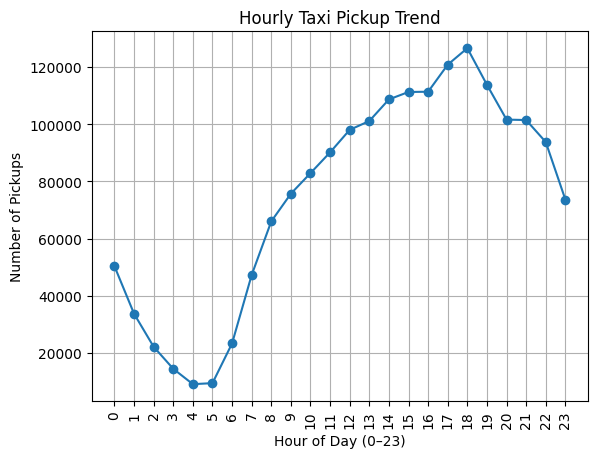

In [72]:
# Find and show the hourly trends in taxi pickups


hourly_pickup_counts = df1_9['tpep_pickup_datetime'].dt.hour.value_counts().reset_index()
hourly_pickup_counts.rename(columns={'tpep_pickup_datetime':'Hourly_Pickup','count':'counts'}, inplace = True)
hourly_pickup_counts.sort_values('Hourly_Pickup', inplace = True)
hourly_pickup_counts

plt.plot(hourly_pickup_counts.Hourly_Pickup, hourly_pickup_counts.counts, marker='o')
plt.title('Hourly Taxi Pickup Trend')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()





Daily trends in taxi pickups (days of the week) tpep_pickup_datetime
,Monday       222904
,Tuesday      259327
,Wednesday    274462
,Thursday     280318
,Friday       264680
,Saturday     260178
,Sunday       224904
,Name: count, dtype: int64 
,
,


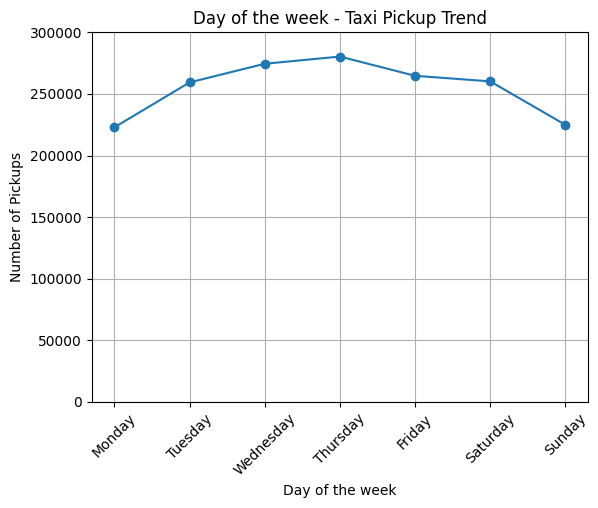

In [73]:
# Find and show the daily trends in taxi pickups (days of the week)
DayOfWeek_pickup_counts = df1_9['tpep_pickup_datetime'].dt.day_name().value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print('Daily trends in taxi pickups (days of the week)',DayOfWeek_pickup_counts,'\n\n')

plt.plot(DayOfWeek_pickup_counts.index, DayOfWeek_pickup_counts.values, marker='o')
plt.title('Day of the week - Taxi Pickup Trend')
plt.xlabel('Day of the week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation = 45)
plt.ylim(0, 300000)
plt.grid(True)
plt.savefig("DayOfWeek_pickup_counts.png", bbox_inches='tight', dpi=300)
plt.show()



Monthly trends in taxi pickups tpep_pickup_datetime
,1     144927
,2     137447
,3     160038
,4     154394
,5     164592
,6     155126
,7     136310
,8     131607
,9     130642
,10    162729
,11    154942
,12    154019
,Name: count, dtype: int64 
,
,


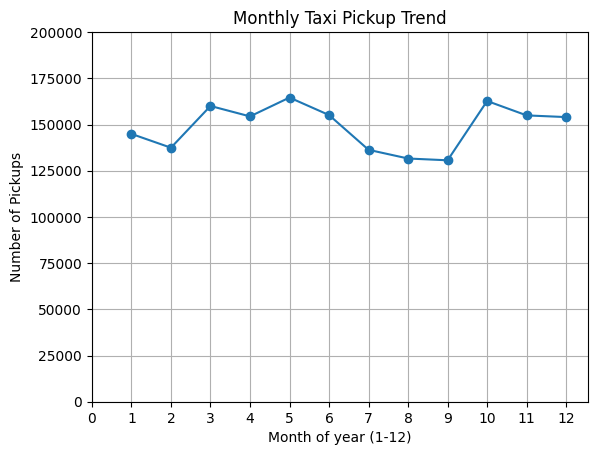

In [74]:
# Show the monthly trends in pickups

monthly_pickup_counts = df1_9['tpep_pickup_datetime'].dt.month.value_counts().sort_index()

print('Monthly trends in taxi pickups',monthly_pickup_counts,'\n\n')

plt.plot(monthly_pickup_counts.index, monthly_pickup_counts.values, marker='o')
plt.title('Monthly Taxi Pickup Trend')
plt.xlabel('Month of year (1-12)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 13))
plt.ylim(0, 200000)
plt.grid(True)
plt.savefig("monthly_pickup_counts.png", bbox_inches='tight', dpi=300)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [77]:
# Analyse the above parameters
# Below are the Percentage of values in columns with Zero value. There are no negative values. 

((df1_9[['fare_amount', 'tip_amount', 'total_amount','trip_distance']] <= 0).sum()/df1_9.shape[0])*100


fare_amount       0.029159
tip_amount       21.810213
total_amount      0.016678
trip_distance     0.918919
dtype: float64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** 
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [80]:
# Create a df with non zero entries for the selected parameters.

# Removing tip_amount containing zero. There are no negative values.
df1_10 = df1_9[~(df1_9.tip_amount <= 0)]

# Removing fare_amount containing zero. There are no negative values
df1_11 = df1_10[~(df1_10.fare_amount <= 0)]

# Removing the distance = 0 in cases where pickup and drop is in the different zone
df1_12 = df1_11[~((df1_11.trip_distance <= 0) & (df1_11.PULocationID != df1_11.DOLocationID)) ]

# Below are the Percentage of values in columns with Zero value. There are no negative values. 
((df1_12[['fare_amount', 'tip_amount', 'total_amount','trip_distance']] <= 0).sum()/df1_12.shape[0])*100




fare_amount      0.000000
tip_amount       0.000000
total_amount     0.000000
trip_distance    0.238422
dtype: float64

**3.1.4** 
Analyse the monthly revenue (`total_amount`) trend

Monthly revenue (total_amount) ---->          total_amount
,Months              
,1         3176659.30
,2         3022834.73
,3         3638147.39
,4         3526293.47
,5         3875052.03
,6         3634389.16
,7         3085302.84
,8         2983359.57
,9         3152203.04
,10        3932682.02
,11        3694035.05
,12        3594431.35 
,
,
,


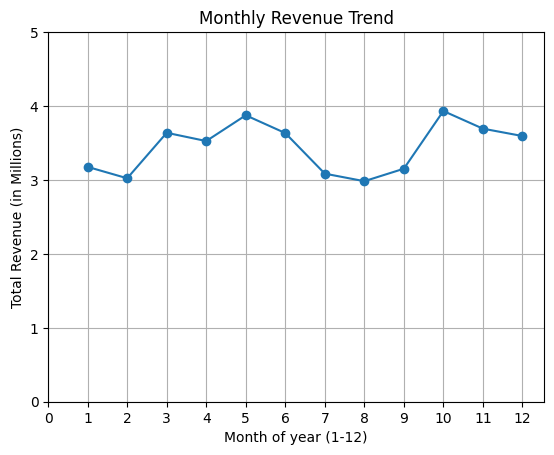

In [82]:
# Group data by month and analyse monthly revenue
df1_12['Months'] = df1_12['tpep_pickup_datetime'].dt.month

Monthly_revenue = df1_12.groupby(['Months'])[['total_amount']].agg('sum')
print('Monthly revenue (total_amount) ----> ',Monthly_revenue,'\n\n\n')


plt.plot(Monthly_revenue.index, Monthly_revenue.values/1000000, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month of year (1-12)')
plt.ylabel('Total Revenue (in Millions)')
plt.xticks(range(0, 13))
plt.ylim(0, 5)
plt.grid(True)
plt.savefig("Monthly_revenue.png", bbox_inches='tight', dpi=300)
plt.show()



**3.1.5** 
Show the proportion of each quarter of the year in the revenue

In [84]:
# Calculate proportion of each quarter
df1_12['Quarter'] = df1_12['tpep_pickup_datetime'].dt.quarter

#print('Proportion of revenue per quater ----> ')
quarterly_revenue = df1_12.groupby(['Quarter'])[['total_amount']].agg('sum')
quarterly_revenue['Proportion (%)'] = round((quarterly_revenue['total_amount']/quarterly_revenue['total_amount'].sum())*100,2)
quarterly_revenue

## Order of quarterly revenue is Q4 > Q2 > Q1 > Q3

,total_amount,Proportion (%)
Quarter,,
1,9837641.42,23.81
2,11035734.66,26.71
3,9220865.45,22.32
4,11221148.42,27.16


**3.1.6** 
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

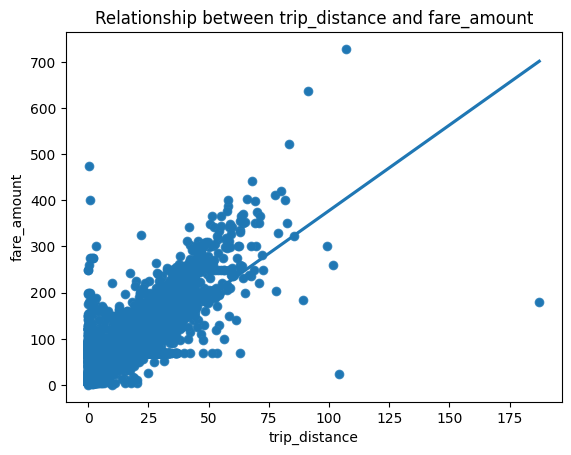

Correlation between trip_distance and fare_amount: 0.95
,
,
,Conclusion - There is strong positive relationship between fare_amount and trip_distance
,
,
,


In [86]:
# Show how trip fare is affected by distance
## Dropping rows with trip_distance = 0

df1_13 = df1_12[~(df1_12.trip_distance == 0)]

sns.scatterplot(x = df1_13['trip_distance'], y = df1_13['fare_amount'])
sns.regplot(x = df1_13['trip_distance'], y = df1_13['fare_amount'])
plt.title('Relationship between trip_distance and fare_amount')
plt.show()

correlation_1 = df1_13['trip_distance'].corr(df1_13['fare_amount'])
print(f'Correlation between trip_distance and fare_amount: {correlation_1:.2f}\n\n')


print('Conclusion - There is strong positive relationship between fare_amount and trip_distance\n\n\n')



**3.1.7** 
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

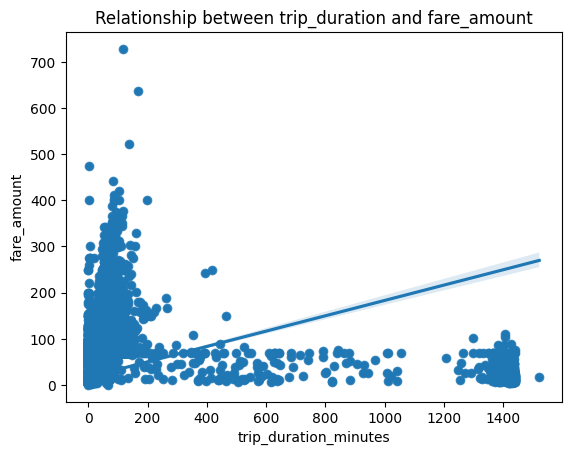

Correlation between trip_duration and fare_amount: 0.33
,
,
,Conclusion - There is weak positive relationship between fare_amount and trip duration
,
,


In [88]:
# Show relationship between fare and trip duration
df1_13['tpep_dropoff_datetime'] = pd.to_datetime(df1_13['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df1_13['tpep_pickup_datetime'] = pd.to_datetime(df1_13['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df1_13['trip_duration'] = (df1_13['tpep_dropoff_datetime'] - df1_13['tpep_pickup_datetime'])

df1_13['trip_duration_minutes'] = df1_13['trip_duration'].dt.total_seconds()/60
np.result_type(np.dtype(df1_13['trip_duration_minutes']), np.complex128)  

# droping duration with negative values

df1_13 = df1_13[~(df1_13.trip_duration_minutes < 0)] 


sns.scatterplot(x = df1_13['trip_duration_minutes'], y = df1_13['fare_amount'])
sns.regplot(x = df1_13['trip_duration_minutes'], y = df1_13['fare_amount'])
plt.title('Relationship between trip_duration and fare_amount')
plt.show()

correlation_2 = df1_13['trip_duration_minutes'].corr(df1_13['fare_amount'])
print(f'Correlation between trip_duration and fare_amount: {correlation_2:.2f}\n\n')



print('Conclusion - There is weak positive relationship between fare_amount and trip duration\n\n')

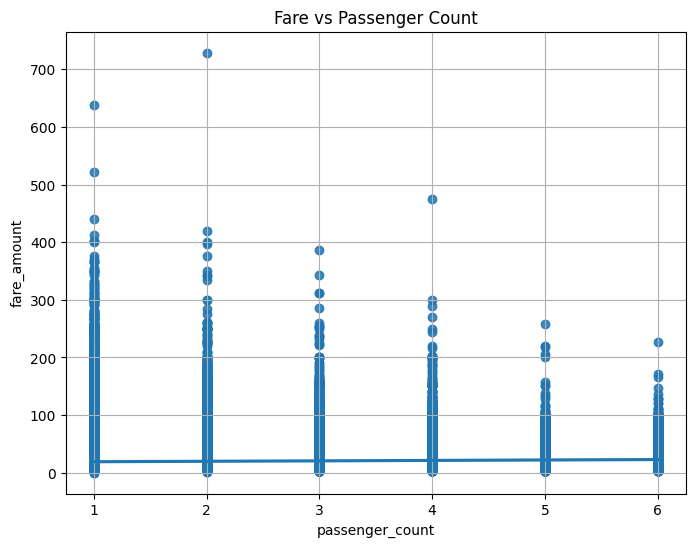

Correlation between passenger_count and fare_amount: 0.04
,
,


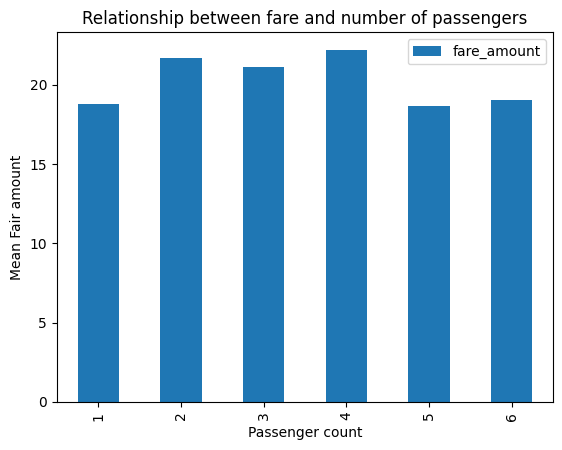

Conclusion - There is no relationship between fare and number of passengers


In [89]:
# Show relationship between fare and number of passengers
#sns.boxplot(x = df1_13['passenger_count'], y = df1_13['fare_amount'])
#plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df1_13['passenger_count'], df1_13['fare_amount'], alpha=0.3)
sns.regplot(x = df1_13['passenger_count'], y = df1_13['fare_amount'])
plt.title('Fare vs Passenger Count')
plt.grid(True)
plt.show()

correlation_3 = df1_13['passenger_count'].corr(df1_13['fare_amount'])
print(f'Correlation between passenger_count and fare_amount: {correlation_3:.2f}\n\n')

## Scatter plot does not give a proper idea. hence ploting the mean fare value per passenger_counts.
df1_13.groupby(['passenger_count'])[['fare_amount']].agg('mean').plot.bar()
plt.title('Relationship between fare and number of passengers')
plt.xlabel('Passenger count')
plt.ylabel('Mean Fair amount')
plt.show()


print('Conclusion - There is no relationship between fare and number of passengers')


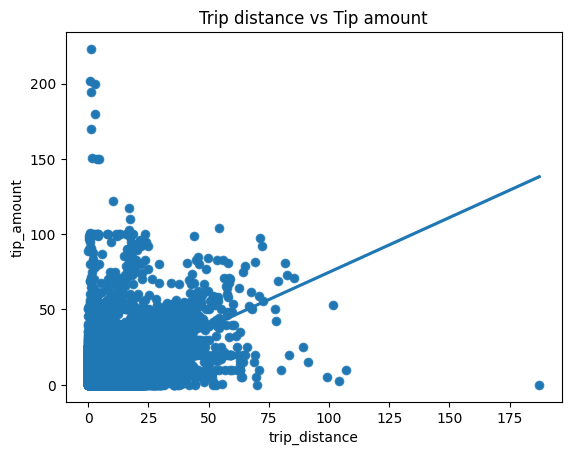

Correlation between trip_distance and tip_amount: 0.80
,
,
,Conclusion - There is strong positive relationship between tip_amount and trip_distance


In [90]:
# Show relationship between tip and trip distance
sns.scatterplot(x = df1_13['trip_distance'], y = df1_13['tip_amount'])
sns.regplot(x = df1_13['trip_distance'], y = df1_13['tip_amount'])
plt.title('Trip distance vs Tip amount')
plt.show()

correlation_4 = df1_13['trip_distance'].corr(df1_13['tip_amount'])
print(f'Correlation between trip_distance and tip_amount: {correlation_4:.2f}\n\n')

print('Conclusion - There is strong positive relationship between tip_amount and trip_distance')

**3.1.8** 
Analyse the distribution of different payment types (`payment_type`)

In [92]:
# Analyse the distribution of different payment types (payment_type).

payment_ditribution = pd.DataFrame
df1_13['payment_type'].value_counts()

df_counts = df1_13['payment_type'].value_counts().reset_index()

# Rename columns (optional but helpful)
df_counts.columns = ['payment_type', 'count']

print('Conclusion - Almost payment is through Credit card (payment_type = 1)\n')
df_counts

Conclusion - Almost payment is through Credit card (payment_type = 1)
,


,payment_type,count
0,1,1391187
1,2,21
2,4,16
3,3,6


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [97]:
!pip install geopandas

,Requirement already satisfied: numpy>=1.22 in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (1.26.4)
,Requirement already satisfied: pyogrio>=0.7.2 in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (0.10.0)
,Requirement already satisfied: packaging in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (24.1)
,Requirement already satisfied: pandas>=1.4.0 in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (2.2.2)
,Requirement already satisfied: pyproj>=3.3.0 in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (3.7.1)
,Requirement already satisfied: shapely>=2.0.0 in /opt/anaconda3/lib/python3.12/site-packages (from geopandas) (2.1.0)
,Requirement already satisfied: python-dateutil>=2.8.2 in /opt/anaconda3/lib/python3.12/site-packages (from pandas>=1.4.0->geopandas) (2.9.0.post0)
,Requirement already satisfied: pytz>=2020.1 in /opt/anaconda3/lib/python3.12/site-packages (from pandas>=1.4.0->geopandas) (2024.1)
,Requirement a

**3.1.9** 
Load the shapefile and display it.

In [99]:
import geopandas as gpd


# Read the shapefile using geopandas
#zones = # read the .shp file using gpd
zones =gpd.read_file('/Users/neerajkumarsingh/EDA_Assignment/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
,RangeIndex: 263 entries, 0 to 262
,Data columns (total 7 columns):
, #   Column      Non-Null Count  Dtype   
,---  ------      --------------  -----   
, 0   OBJECTID    263 non-null    int32   
, 1   Shape_Leng  263 non-null    float64 
, 2   Shape_Area  263 non-null    float64 
, 3   zone        263 non-null    object  
, 4   LocationID  263 non-null    int32   
, 5   borough     263 non-null    object  
, 6   geometry    263 non-null    geometry
,dtypes: float64(2), geometry(1), int32(2), object(2)
,memory usage: 12.5+ KB
,None


<Axes: >

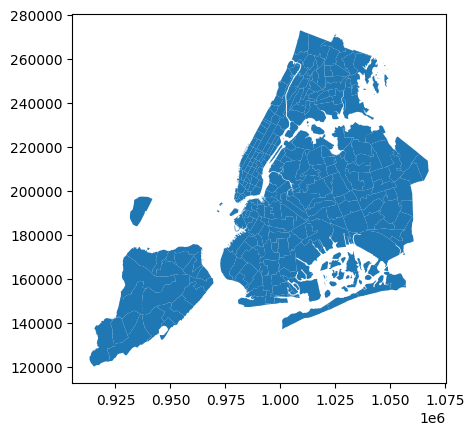

In [101]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10**
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [104]:
# Merge zones and trip records using locationID and PULocationID
pd.set_option('display.max_columns', 35)
df1_14 = pd.merge(df1_13,zones, how='inner', left_on = 'PULocationID', right_on = 'LocationID')
df1_14#.info()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee,Months,Quarter,trip_duration,trip_duration_minutes,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,1,1,0 days 00:05:05,5.083333,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,7.10,1,N,246,37,1,34.5,3.5,0.5,7.90,0.0,1.0,47.40,2.5,0.00,1,1,0 days 00:33:37,33.616667,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2,1.59,1,N,79,164,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.00,1,1,0 days 00:10:31,10.516667,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,3.16,1,N,79,256,1,19.1,1.0,0.5,6.02,0.0,1.0,30.12,2.5,0.00,1,1,0 days 00:15:53,15.883333,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1,7.64,1,N,132,95,1,31.7,1.0,0.5,7.09,0.0,1.0,42.54,0.0,1.25,1,1,0 days 00:17:08,17.133333,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378969,2,2023-12-31 23:03:04,2023-12-31 23:13:06,1,1.27,1,N,79,158,1,10.7,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.00,12,4,0 days 00:10:02,10.033333,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
1378970,2,2023-12-31 23:38:35,2024-01-01 00:05:50,5,9.29,1,N,48,25,1,41.5,1.0,0.5,9.30,0.0,1.0,55.80,2.5,0.00,12,4,0 days 00:27:15,27.250000,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
1378971,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1,0.81,1,N,263,262,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00,12,4,0 days 00:05:55,5.916667,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22..."
1378972,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1,5.78,1,N,161,261,1,27.5,1.0,0.5,4.00,0.0,1.0,36.50,2.5,0.00,12,4,0 days 00:19:32,19.533333,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."


**3.1.11** 
Group data by location IDs to find the total number of trips per location ID

In [106]:
# Group data by location and calculate the number of trips
## Did Value count per location on the data frame. This will give same result as grouping the data.
Trip_per_locationId = df1_14.LocationID.value_counts().reset_index()

Trip_per_locationId.columns = ['LocationID','trip_count']
Trip_per_locationId


,LocationID,trip_count
0,237,68714
1,161,66652
2,132,63064
3,236,62557
4,162,51884
...,...,...
218,227,1
219,251,1
220,81,1
221,46,1


**3.1.12**
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [108]:
# Merge trip counts back to the zones GeoDataFrame
zones['LocationID'] = zones['LocationID'].astype(int)
zones_with_trip_count = pd.merge(zones,Trip_per_locationId, how='left', on = 'LocationID')
zones_with_trip_count['trip_count'].fillna(0, inplace = True)
zones_with_trip_count


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",35.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1379.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",0.0
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",103.0
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",6831.0
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",19026.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** 
Plot a color-coded map showing zone-wise trips

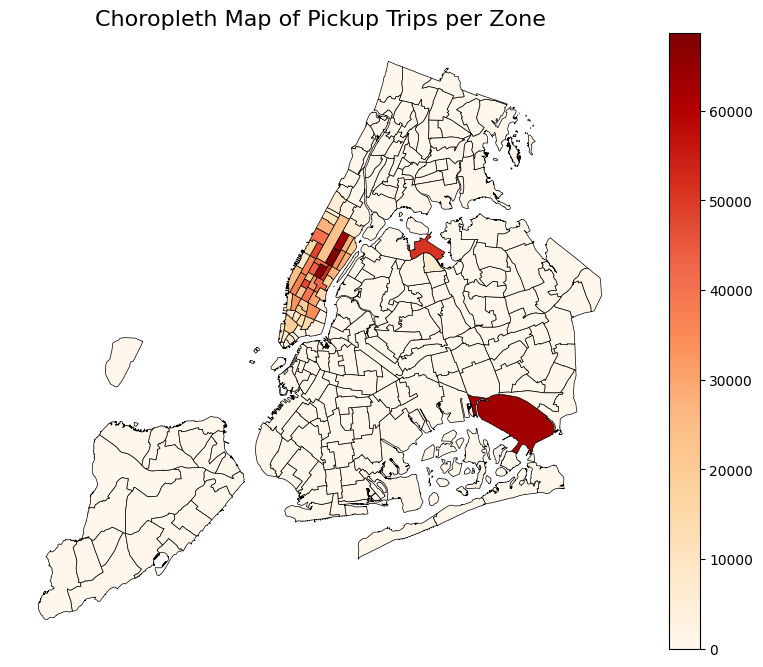

In [112]:
# Define figure and axis


fig, ax = plt.subplots(1,1,figsize=(10, 8))

zones_with_trip_count.plot(column='trip_count',
            cmap='OrRd',           # Color scale: Orange-Red
            linewidth=0.5,
            edgecolor='black',
            legend=True,
            ax=ax)

ax.set_title('Choropleth Map of Pickup Trips per Zone', fontsize=16)
ax.axis('off')

plt.show()



In [113]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trip_count_sorted = zones_with_trip_count.sort_values(['trip_count'], ascending = False)
zones_with_trip_count_sorted

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",68714.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",66652.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",63064.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",62557.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",51884.0
...,...,...,...,...,...,...,...,...
148,149,0.083681,0.000271,Madison,149,Brooklyn,"POLYGON ((999782.783 162246.843, 999853.961 16...",0.0
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((939754.454 131548.91, 939802.804 131...",0.0
146,147,0.058765,0.000106,Longwood,147,Bronx,"POLYGON ((1013266.371 240896.958, 1013354.947 ...",0.0
85,86,0.134245,0.000623,Far Rockaway,86,Queens,"POLYGON ((1049025.346 163141.969, 1049041.462 ...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies


Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** 
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [122]:
# Find routes which have the slowest speeds at different times of the day


df1_14['Pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

df1_14['trip_duration_hour'] =  df1_14['trip_duration_minutes']/60


df1_14_grouped = df1_14.groupby(['PULocationID', 'DOLocationID', 'Pickup_hour']).agg(
    avg_duration=('trip_duration_hour', 'mean'),
    avg_distance=('trip_distance', 'mean'),    
).reset_index()


df1_14_grouped['avg_speed'] = df1_14_grouped['avg_distance'] / df1_14_grouped['avg_duration']

#df1_14_grouped


slow_routes = df1_14_grouped.sort_values(by=['avg_speed'])
slow_routes

# Slowest 20 routs based on pickup hour.
slow_routes.head(20)





,PULocationID,DOLocationID,Pickup_hour,avg_duration,avg_distance,avg_speed
99757,243,264,16.0,23.159167,0.180000,0.007772
7602,45,45,17.0,0.840556,0.050000,0.059484
80616,224,113,12.0,12.000278,0.850000,0.070832
16241,70,138,14.0,17.376111,1.490000,0.085750
42779,137,233,3.0,6.099861,0.780000,0.127872
9851,48,184,15.0,1.094444,0.140000,0.127919
78636,211,52,6.0,23.848889,3.170000,0.132920
5942,43,24,4.0,11.993889,1.680000,0.140071
31284,113,66,19.0,23.809722,3.430000,0.144059
76977,193,193,9.0,0.066667,0.010000,0.150000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** 
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

The busiest hour of the day is 18.0 with 95803 trips


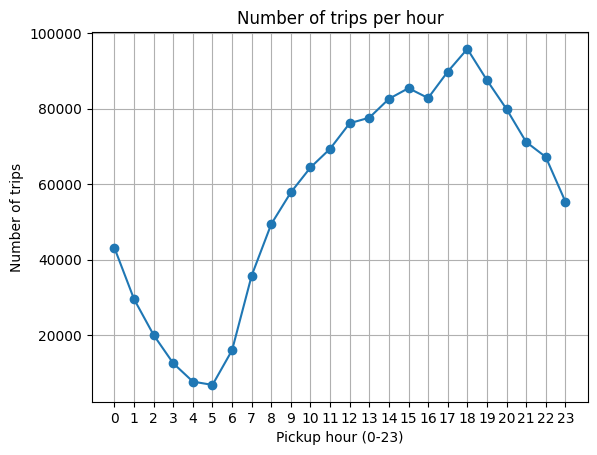

In [125]:
# Visualise the number of trips per hour and find the busiest hour
trip_per_hour = df1_14.groupby(['Pickup_hour']).agg(count_of_trip = ('tpep_pickup_datetime', 'count')).reset_index()

Busiest_hour = trip_per_hour.sort_values(by = 'count_of_trip', ascending = False ).head(1).iloc[0,0]
Busiest_hour_trip_count = trip_per_hour.sort_values(by = 'count_of_trip', ascending = False ).head(1).iloc[0,1]

print(f'\033[1mThe busiest hour of the day is {Busiest_hour} with {Busiest_hour_trip_count} trips\033[0m')


plt.plot(trip_per_hour.Pickup_hour, trip_per_hour.count_of_trip, marker='o')
plt.title('Number of trips per hour')
plt.xlabel('Pickup hour (0-23)')
plt.ylabel('Number of trips')
plt.xticks(range(0, 24))
#plt.ylim(0, 4500000)
plt.grid(True)
plt.show()




Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** 
Find the actual number of trips in the five busiest hours

In [128]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.05

trip_per_hour['count_of_trip_scaled_up'] = trip_per_hour['count_of_trip']/sample_fraction

Busiest_hour = trip_per_hour.sort_values(by = 'count_of_trip_scaled_up', ascending = False ).head(5)
print('\033[1mBelow are the 5 busiest hours and their respective scaled up number of trips\033[0m')

Busiest_hour[['Pickup_hour','count_of_trip_scaled_up']]





Below are the 5 busiest hours and their respective scaled up number of trips


,Pickup_hour,count_of_trip_scaled_up
18,18.0,1916060.0
17,17.0,1795560.0
19,19.0,1750580.0
15,15.0,1708120.0
16,16.0,1655760.0


**3.2.4** 
Compare hourly traffic pattern on weekdays. Also compare for weekend.

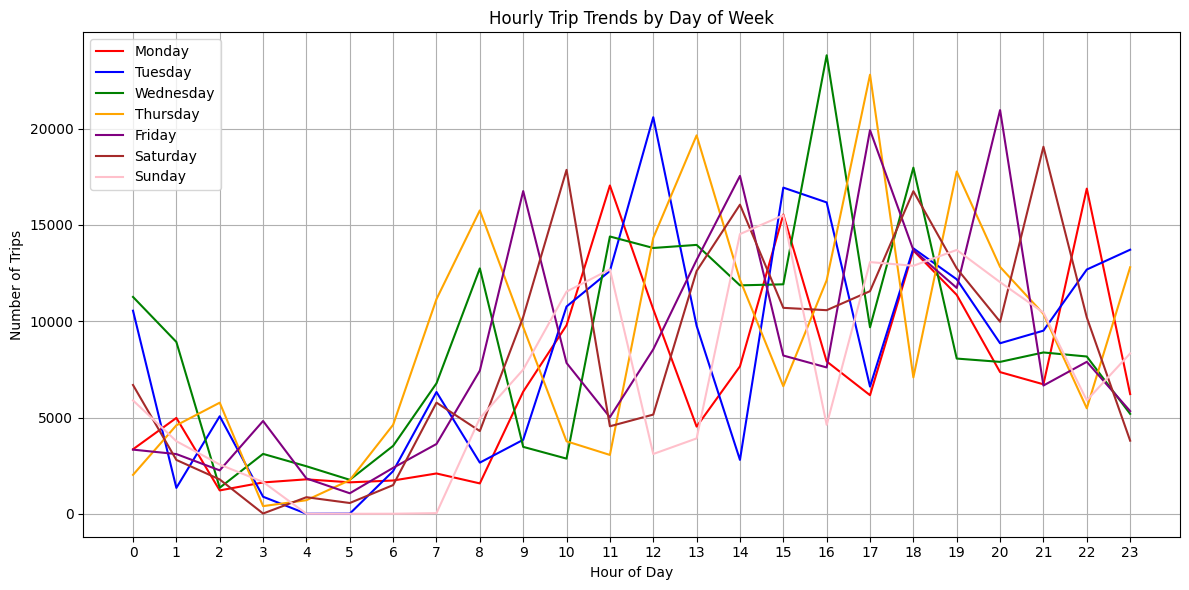

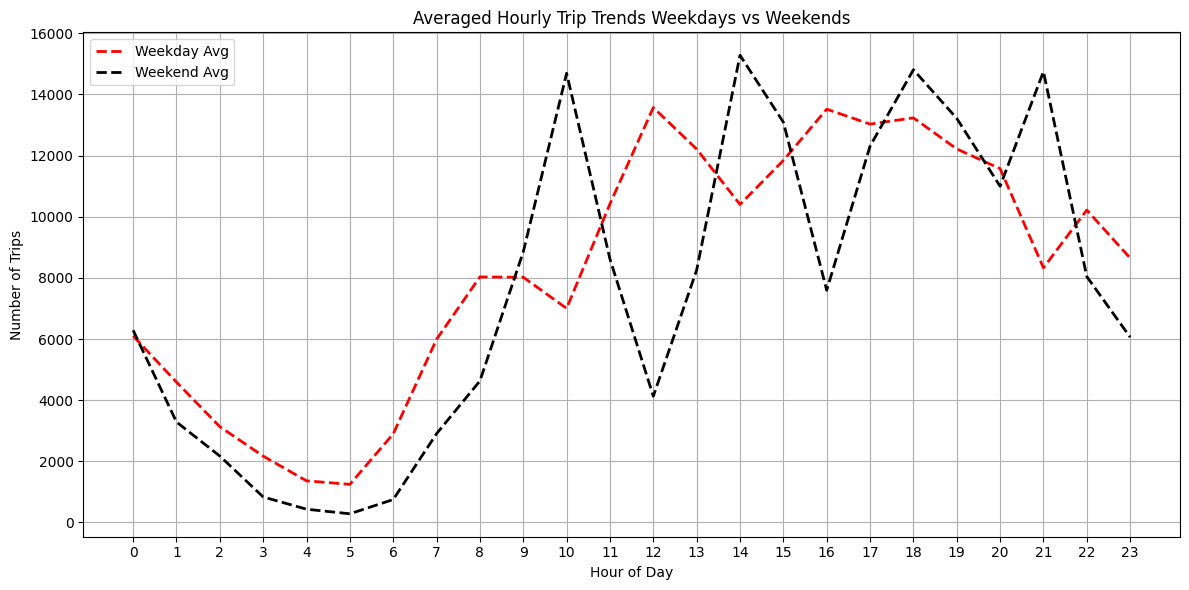

In [130]:
# Compare traffic trends for the week days and weekends
df1_14['days_of_week'] = df1_14['tpep_pickup_datetime'].dt.day_name()

# First find the horly trend for every day
hourly_trend_per_day_of_week  = df1_14.groupby(['Pickup_hour','days_of_week']).agg(count_of_trip=('tpep_pickup_datetime', 'count')).reset_index()


## Per Day hourly traffic
Monday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Monday'])]
Tuesday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Tuesday'])]
Wednesday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Wednesday'])]
Thursday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Thursday'])]
Friday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Friday'])]
Saturday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Saturday'])]
Sunday = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Sunday'])]

## Weekdays hourly traffic
hourly_trend_for_week_day = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Monday', 'Tuesday','Wednesday','Thursday','Friday'])]

## Weekend hourly traffic
hourly_trend_for_weekend = hourly_trend_per_day_of_week[hourly_trend_per_day_of_week.days_of_week.isin(['Saturday', 'Sunday'])]

## Avg Weekdays hourly traffic
Avg_hourly_trend_for_week_day  = hourly_trend_for_week_day.groupby(['Pickup_hour']).agg(Avg_count_of_trip=('count_of_trip', 'mean')).reset_index()

## Avg Weekend hourly traffic
Avg_hourly_trend_for_weekend  = hourly_trend_for_weekend.groupby(['Pickup_hour']).agg(Avg_count_of_trip=('count_of_trip', 'mean')).reset_index()




plt.figure(figsize=(12, 6))

# Daily trends
plt.plot(Monday.Pickup_hour, Monday.count_of_trip, label='Monday', color='red')
plt.plot(Tuesday.Pickup_hour, Tuesday.count_of_trip, label='Tuesday', color='blue')
plt.plot(Wednesday.Pickup_hour, Wednesday.count_of_trip, label='Wednesday', color='green')
plt.plot(Thursday.Pickup_hour, Thursday.count_of_trip, label='Thursday', color='orange')
plt.plot(Friday.Pickup_hour, Friday.count_of_trip, label='Friday', color='purple')
plt.plot(Saturday.Pickup_hour, Saturday.count_of_trip, label='Saturday', color='brown')
plt.plot(Sunday.Pickup_hour, Sunday.count_of_trip, label='Sunday', color='pink')

# Plot formatting
plt.title('Hourly Trip Trends by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
# Average trends
plt.plot(Avg_hourly_trend_for_week_day.Pickup_hour,
         Avg_hourly_trend_for_week_day.Avg_count_of_trip,
         label='Weekday Avg', color='red', linewidth=2, linestyle='--')

plt.plot(Avg_hourly_trend_for_weekend.Pickup_hour,
         Avg_hourly_trend_for_weekend.Avg_count_of_trip,
         label='Weekend Avg', color='black', linewidth=2, linestyle='--')

# Plot formatting
plt.title('Averaged Hourly Trip Trends Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
### There two kind of analysis that can be done using the above data.
1. Per day hourly analysis to find busy and quite hours.
2. Overall averaged value in week day (Monday to Friday) vs weekend (Saturday and Sunday)

Method 1:
Per day hourly analysis to find busy and quite hours.
1. Quite hours - This consitently found after 2:00 AM to early morning (before 6 AM). This is a little prolonged   till 7:00 AM in the morning for Sunday, which make sense since it a holiday and peaple want to relax.
2. Busy hour - Every day has its own peak in terms  between morning to noon hours and then evening hours.
3. Example:- Monday has peak hour at 11, 15 and 22 hour. People start late in the morning and go home late. Tuesday has peak hour at noon. Wednesday has peak hour at 8, 11 and 16 in increasing order. Thursday has peak at hour 8, 13 and 17 in increasing order. Friday had peak hours at 9, 14, 17, 20 which make sense at people want to finish their work and go home. Saturday has peak hour at 10, 14, 18. Sunday is relatively a less busy day, the peak hour is at 11 and 15.

Method 2:
Overall averaged value in week day (Monday to Friday) vs weekend (Saturday and Sunday)
1. Averaged hourly value for week days shows that traffic peaks at noon and remains busy till 18 and then goes down slowly. Quite hour start from 2:00 to 5:00 and then peaks up slowly
2. Averaged hourly value for weekend show more traffic at 10, 14, 18 and 21. Quite hour start from 2:00 to 5:00 and then peaks up slowly.
3. In general traffic is much lower on weekend as compared to weekdays till 8:00. But then it peaks up. Between 10:00 to 21:00, there is contrasting trend for weekends vs weekdays busy hours.
4. Averaged hourly value for weekend show more traffic at 10, 14, 18 and 21 hour than weekday averaged values.


This analysis will help in meeting the opertational efficiecies based on the hourly and daily requirement.

**3.2.5** 
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [133]:
# Find top 10 pickup and dropoff zones

## Top 10 pickup zones
Top_10_zones_with_high_pickups =  df1_14.groupby(['PULocationID']).agg(count_of_pickups_in_zone=('tpep_pickup_datetime', 'count')
).reset_index().sort_values(by = 'count_of_pickups_in_zone', ascending  = False ).head(10)


Top_10_zone_name_with_high_pickups = pd.merge(Top_10_zones_with_high_pickups,zones[['LocationID','zone']], how = 'inner', left_on  = 'PULocationID', right_on = 'LocationID')[['zone', 'count_of_pickups_in_zone']]                                                                                             
#Top_10_zone_name_with_high_pickups

print('\033[1mTop 10 pickup zones\033[0m \n',Top_10_zone_name_with_high_pickups,'\n')

print('______________________________________________________________________ \n\n')

## Top 10 dropoff zones
Top_10_zones_with_high_dropoff =  df1_14.groupby(['DOLocationID']).agg(count_of_dropoff_in_zone=('tpep_dropoff_datetime', 'count')).reset_index().sort_values(by = 'count_of_dropoff_in_zone', ascending  = False ).head(10)

Top_10_zone_name_with_high_dropoffs = pd.merge(Top_10_zones_with_high_dropoff,zones[['LocationID','zone']], how = 'inner', left_on  = 'DOLocationID', right_on = 'LocationID')[['zone', 'count_of_dropoff_in_zone']]                                                                                             


print('\033[1mTop 10 dropoff zones\033[0m \n',Top_10_zone_name_with_high_dropoffs,'\n\n')
print('______________________________________________________________________ \n\n')

#####################################################################################################################################
## Top 10 pickup zones hourly
Top_10_zones_with_high_pickups_hour =  df1_14.groupby(['PULocationID','Pickup_hour']).agg(count_of_pickups_in_zone=('tpep_pickup_datetime', 'count')
).reset_index().sort_values(by = 'count_of_pickups_in_zone', ascending  = False ).head(10)


Top_10_zone_name_with_high_pickups_hour = pd.merge(Top_10_zones_with_high_pickups_hour,zones[['LocationID','zone']], how = 'inner', left_on  = 'PULocationID', right_on = 'LocationID')[['zone','Pickup_hour', 'count_of_pickups_in_zone']]                                                                                             


print('\033[1mTop 10 hourly pickup zones\033[0m \n',Top_10_zone_name_with_high_pickups_hour,'\n')

print('______________________________________________________________________ \n\n')

#Top 10 dropoff zones
df1_14['Dropoff_hour'] = df1_14['tpep_dropoff_datetime'].dt.hour
Top_10_zones_with_high_dropoff_hour =  df1_14.groupby(['DOLocationID','Dropoff_hour']).agg(count_of_dropoff_in_zone=('tpep_dropoff_datetime', 'count')).reset_index().sort_values(by = 'count_of_dropoff_in_zone', ascending  = False ).head(10)

Top_10_zone_name_with_high_dropoffs_hour = pd.merge(Top_10_zones_with_high_dropoff_hour,zones[['LocationID','zone']], how = 'inner', left_on  = 'DOLocationID', right_on = 'LocationID')[['zone','Dropoff_hour', 'count_of_dropoff_in_zone']]                                                                                             


print('\033[1mTop 10 hourly dropoff zones\033[0m \n',Top_10_zone_name_with_high_dropoffs_hour,'\n\n')
print('______________________________________________________________________ \n\n')

##


Top 10 pickup zones 
,                            zone  count_of_pickups_in_zone
,0         Upper East Side South                     68714
,1                Midtown Center                     66652
,2                   JFK Airport                     63064
,3         Upper East Side North                     62557
,4                  Midtown East                     51884
,5             LaGuardia Airport                     51090
,6           Lincoln Square East                     48079
,7  Penn Station/Madison Sq West                     47768
,8     Times Sq/Theatre District                     43760
,9                   Murray Hill                     42492 
,
,______________________________________________________________________ 
,
,
,Top 10 dropoff zones 
,                         zone  count_of_dropoff_in_zone
,0      Upper East Side North                     66302
,1      Upper East Side South                     61355
,2             Midtown Center                     54346
,

**3.2.6**
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [135]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

## Zone wise pickup counts
zones_wise_count_with_pickups =  df1_14.groupby(['PULocationID']).agg(count_of_pickups_in_zone=('tpep_pickup_datetime', 'count')).reset_index()
zones_name_wise_count_with_pickups = pd.merge(zones_wise_count_with_pickups,zones[['LocationID','zone']], how = 'inner', left_on  = 'PULocationID', right_on = 'LocationID')[['zone', 'count_of_pickups_in_zone']]                                                                     

## Zone wise dropoff counts
zones_wise_count_with_dropoff =  df1_14.groupby(['DOLocationID']).agg(count_of_dropoff_in_zone=('tpep_dropoff_datetime', 'count')).reset_index()
zones_name_wise_count_with_dropoff = pd.merge(zones_wise_count_with_dropoff,zones[['LocationID','zone']], how = 'inner', left_on  = 'DOLocationID', right_on = 'LocationID')[['zone', 'count_of_dropoff_in_zone']]                                                                     

## Merge zone wise pickup and dropoff count data.
zones_wise_count_with_pickups_and_dropoff = pd.merge(zones_name_wise_count_with_pickups,zones_name_wise_count_with_dropoff, how='outer', on =  'zone').drop_duplicates()

## Find ratio(pickup/drop)
zones_wise_count_with_pickups_and_dropoff['ratio(pickup/drop)'] = zones_wise_count_with_pickups_and_dropoff['count_of_pickups_in_zone'] / zones_wise_count_with_pickups_and_dropoff['count_of_dropoff_in_zone']

''' 
Since the analysis is run on just 5% of sample, there are zone with no pickup and drop count. These all values will get flagged as "NaN" value and their ratio (pickup/drop) will also be "NaN".
Hence, dropping rows with ratio as "NaN" values for further analysis.
'''
## Filter out NaN values in from ratio(pickup/drop)
zones_wise_ratio_with_non_nan = zones_wise_count_with_pickups_and_dropoff[~(zones_wise_count_with_pickups_and_dropoff['ratio(pickup/drop)'].isnull())]

## Sort ratio(pickup/drop) in ascending order
zones_wise_ratio_sorted = zones_wise_ratio_with_non_nan.sort_values(by = 'ratio(pickup/drop)', ascending = False)
zones_wise_ratio_sorted

print('\033[1m10 highest (pickup/drop) ratios\033[0m \n',zones_wise_ratio_sorted[['zone','ratio(pickup/drop)']].head(10), '\n\n===========================\n')

print('\033[1m10 lowest (pickup/drop) ratios\033[0m \n',zones_wise_ratio_sorted[['zone','ratio(pickup/drop)']].tail(10), '\n')


10 highest (pickup/drop) ratios 
,                                  zone  ratio(pickup/drop)
,69                      East Elmhurst           14.120267
,123                       JFK Airport            4.763502
,133                 LaGuardia Airport            2.892815
,203  Saint Michaels Cemetery/Woodside            2.000000
,182      Penn Station/Madison Sq West            1.650188
,108           Greenwich Village South            1.386735
,40                       Central Park            1.385507
,245                      West Village            1.333067
,157                      Midtown East            1.278813
,98                   Garment District            1.227710 
,
,===========================
,
,10 lowest (pickup/drop) ratios 
,                              zone  ratio(pickup/drop)
,11                      Bay Ridge            0.011019
,253               Windsor Terrace            0.009615
,204  Schuylerville/Edgewater Park            0.009434
,35                Cambria He

**3.2.7** 
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [137]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

## Top pickup zone in night hour (between 11pm to 5am)

pickup_night = df1_14[df1_14.Pickup_hour.isin([23,0,1,2,3,4,5])]
zones_wise_pickup_night_count =  pickup_night.groupby(['PULocationID']).agg(count_of_pickups_in_zone=('tpep_pickup_datetime', 'count')).reset_index()
zones_name_wise_pickup_night_count = pd.merge(zones_wise_pickup_night_count,zones[['LocationID','zone']], how = 'inner', left_on  = 'PULocationID', right_on = 'LocationID').drop_duplicates().sort_values(by = 'count_of_pickups_in_zone', ascending = False)                                                                     
zones_name_wise_pickup_night_count[['zone', 'count_of_pickups_in_zone']]

print('\033[1mTop 10 pickup zones during night hours(11pm to 5am)\033[0m \n\n',zones_name_wise_pickup_night_count[['zone', 'count_of_pickups_in_zone']].head(10), '\n\n========================================\n')


## Top dropoff zone in night hour (between 11pm to 5am)


dropoff_night = df1_14[df1_14.Dropoff_hour.isin([23,0,1,2,3,4,5])]
zones_wise_dropoff_night_count =  dropoff_night.groupby(['DOLocationID']).agg(count_of_dropoff_in_zone=('tpep_dropoff_datetime', 'count')).reset_index()
zones_name_wise_dropoff_night_count = pd.merge(zones_wise_dropoff_night_count,zones[['LocationID','zone']], how = 'inner', left_on  = 'DOLocationID', right_on = 'LocationID').drop_duplicates().sort_values(by = 'count_of_dropoff_in_zone', ascending = False)                                                                     
zones_name_wise_dropoff_night_count[['zone', 'count_of_dropoff_in_zone']]

print('\033[1mTop 10 dropoff zones during night hours(11pm to 5am)\033[0m \n\n',zones_name_wise_dropoff_night_count[['zone', 'count_of_dropoff_in_zone']].head(10), '\n')



Top 10 pickup zones during night hours(11pm to 5am) 
,
,                              zone  count_of_pickups_in_zone
,145         Upper East Side South                      9090
,96                 Midtown Center                      8741
,75                    JFK Airport                      8225
,144         Upper East Side North                      8224
,97                   Midtown East                      6822
,80              LaGuardia Airport                      6655
,110  Penn Station/Madison Sq West                      6053
,83            Lincoln Square East                      6036
,139     Times Sq/Theatre District                      5544
,103                   Murray Hill                      5531 
,
,========================================
,
,Top 10 dropoff zones during night hours(11pm to 5am) 
,
,                       zone  count_of_dropoff_in_zone
,77            East Village                      7141
,46            Clinton East                      5464
,163  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** 
Find the revenue share for nighttime and daytime hours.

In [139]:
# Filter for night hours (11 PM to 5 AM)

## Revenue is Based on Pickup Time
###pickup_night
nighttime_hours = pickup_night.copy(deep=True)
night_revenue = nighttime_hours.total_amount.sum()
print(f'\033[1mRevenue collected during night hours(11pm to 5am) is {round(night_revenue,2)}\033[0m \n\n')

###pickup_day
daytime_hours = df1_14[(df1_14.Pickup_hour.isin([22.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,17., 18., 19., 20., 21.]))]
day_revenue = daytime_hours.total_amount.sum()
print(f'\033[1mRevenue collected during day hours(6am to 10pm) is {round(day_revenue,2)}\033[0m \n\n')

### comparison of days revenue with night revenue

fold_change = round(day_revenue,2)/round(night_revenue,2)
print(f'\033[1mRevenue collected during day hours(6am to 10pm) is {round(fold_change,2)} time of night revenue\033[0m \n\n')



Revenue collected during night hours(11pm to 5am) is 5262030.74 
,
,
,Revenue collected during day hours(6am to 10pm) is 35094976.05 
,
,
,Revenue collected during day hours(6am to 10pm) is 6.67 time of night revenue 
,
,


##### Pricing Strategy

**3.2.9** 
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [142]:
# Analyse the fare per mile per passenger for different passenger counts

df1_14['fare_per_mile'] = round(df1_14['fare_amount']/df1_14['trip_distance'],2)
df1_14['fare_per_mile_per_passenger'] = round(df1_14['fare_per_mile']/df1_14['passenger_count'],2)

fare_based_passenger_count =  df1_14.groupby(['passenger_count']).agg(Avg_fare_per_mile_per_passenger = ('fare_per_mile_per_passenger','mean')).reset_index()

print('\033[1mConclusion - More the passenger count for a trip, there is lesser average fare per mile per passenger \033[0m \n\n', fare_based_passenger_count,'\n\n')



Conclusion - More the passenger count for a trip, there is lesser average fare per mile per passenger  
,
,    passenger_count  Avg_fare_per_mile_per_passenger
,0                1                         9.185894
,1                2                         4.920596
,2                3                         3.316006
,3                4                         3.768017
,4                5                         1.589689
,5                6                         1.284483 
,
,


**3.2.10** 
Find the average fare per mile by hours of the day and by days of the week

Average fare per mile is relatively higher on Sunday of all the days of week 
,
,               Avg_fare_per_mile
,days_of_week                   
,Monday                 9.027040
,Tuesday                9.385368
,Wednesday              9.250473
,Thursday               9.683485
,Friday                 9.208735
,Saturday               8.993628
,Sunday                10.230180


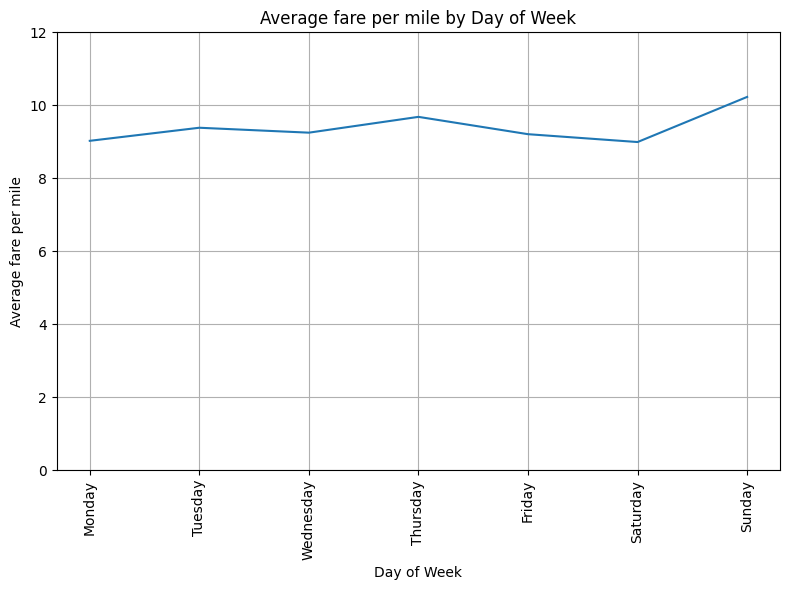

Average fare per mile is relatively higher(over 10) at 10,20 and 23 hour of day 
,
,              Avg_fare_per_mile
,Pickup_hour                   
,0.0                   9.089970
,1.0                   9.547013
,2.0                   9.137831
,3.0                   9.143350
,4.0                   8.628054
,5.0                   9.333927
,6.0                   8.931048
,7.0                   9.078208
,8.0                   8.879060
,9.0                   9.907960
,10.0                 10.091293
,11.0                  9.511313
,12.0                  8.953768
,13.0                  9.778977
,14.0                  9.279100
,15.0                  9.341220
,16.0                  9.134349
,17.0                  9.120590
,18.0                  9.357966
,19.0                  9.321764
,20.0                 10.136615
,21.0                  9.547929
,22.0                  8.681847
,23.0                 10.065190


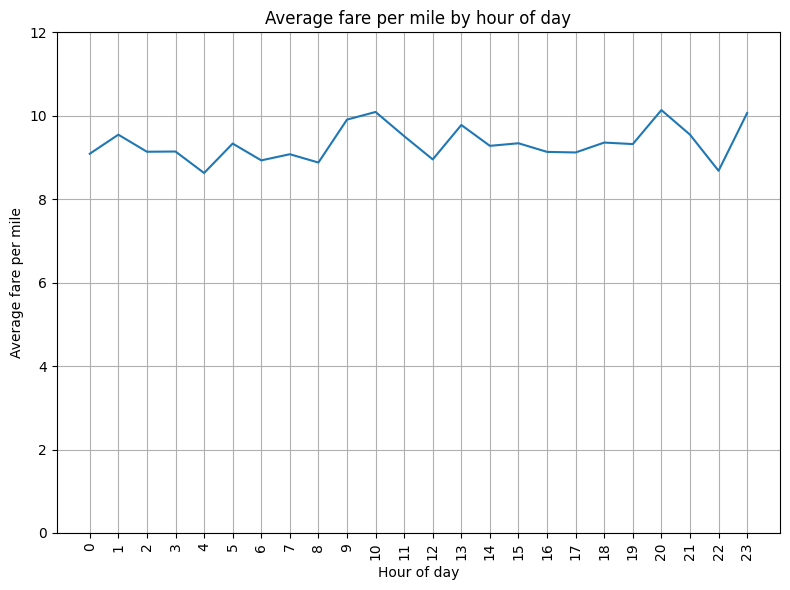

In [144]:
# Compare the average fare per mile for different days and for different times of the day

#Average fare per mile for different days

Average_fare_per_mile_for_different_days = df1_14.groupby(['days_of_week']).agg(Avg_fare_per_mile = ('fare_per_mile','mean')).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
Average_fare_per_mile_for_different_days

print('\033[1mAverage fare per mile is relatively higher on Sunday of all the days of week\033[0m \n\n',Average_fare_per_mile_for_different_days)


plt.figure(figsize=(8, 6))

# Daily trends
plt.plot(Average_fare_per_mile_for_different_days.index, Average_fare_per_mile_for_different_days.Avg_fare_per_mile)

# Plot formatting
plt.title('Average fare per mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average fare per mile')
plt.grid(True)
plt.ylim(0,12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


#Average fare per mile for different times of the day

Average_fare_per_mile_for_different_hour_of_day = df1_14.groupby(['Pickup_hour']).agg(Avg_fare_per_mile = ('fare_per_mile','mean'))
Average_fare_per_mile_for_different_hour_of_day

print('\033[1mAverage fare per mile is relatively higher(over 10) at 10,20 and 23 hour of day\033[0m \n\n',Average_fare_per_mile_for_different_hour_of_day)

plt.figure(figsize=(8, 6))

# Daily trends
plt.plot(Average_fare_per_mile_for_different_hour_of_day.index, Average_fare_per_mile_for_different_hour_of_day.Avg_fare_per_mile)

# Plot formatting
plt.title('Average fare per mile by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Average fare per mile')
plt.grid(True)
plt.ylim(0,12)
plt.xticks(range(0, 24))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()



**3.2.11** 
Analyse the average fare per mile for the different vendors for different hours of the day

In [146]:
# Compare fare per mile for different vendors

Avg_fare_per_mile_for_different_vendors = df1_14.groupby(['VendorID']).agg(Avg_fare_per_mile = ('fare_per_mile','mean'))
Avg_fare_per_mile_for_different_vendors

#1= Creative Mobile Technologies, LLC;
#2= VeriFone Inc.

print('\033[1mAverage fare per mile is relatively higher for Vendor 2 (VeriFone Inc.)\033[0m \n\n',Avg_fare_per_mile_for_different_vendors)


# Compare fare per mile for different vendors per hour
vendors1 = df1_14[df1_14.VendorID ==1]
vendors2 = df1_14[df1_14.VendorID ==2]

Avg_fare_per_mile_for_different_vendors1_per_hour = vendors1.groupby(['Pickup_hour']).agg(Avg_fare_per_mile_VendorID_1 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_different_vendors1_per_hour
Avg_fare_per_mile_for_different_vendors2_per_hour = vendors2.groupby(['Pickup_hour']).agg(Avg_fare_per_mile_VendorID_2 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_different_vendors2_per_hour

Avg_fare_per_mile_for_different_vendors_per_hour = pd.merge(Avg_fare_per_mile_for_different_vendors1_per_hour,Avg_fare_per_mile_for_different_vendors2_per_hour, how='inner',on ='Pickup_hour')


print('\n\n\033[1mEven based on hours, Average fare per mile for VendorID 2 is higher than VendorID1 for every hour\033[0m\n\n', Avg_fare_per_mile_for_different_vendors_per_hour)



Average fare per mile is relatively higher for Vendor 2 (VeriFone Inc.) 
,
,           Avg_fare_per_mile
,VendorID                   
,1                  7.900854
,2                  9.872120
,
,
,Even based on hours, Average fare per mile for VendorID 2 is higher than VendorID1 for every hour
,
,     Pickup_hour  Avg_fare_per_mile_VendorID_1  Avg_fare_per_mile_VendorID_2
,0           0.0                      7.961883                      9.445770
,1           1.0                      7.972942                     10.061606
,2           2.0                      8.003628                      9.509975
,3           3.0                      8.317804                      9.417507
,4           4.0                      8.187591                      8.766127
,5           5.0                      8.610283                      9.567857
,6           6.0                      7.822009                      9.287584
,7           7.0                      7.964732                      9.445846
,8       

**3.2.12** 
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [148]:
# Defining distance tiers
df1_14.loc[df1_14.trip_distance <=2,'distance_tier']= 'Upto 2 miles'
df1_14.loc[(df1_14.trip_distance <= 5) & (df1_14.trip_distance > 2),'distance_tier']= 'From 2 to 5 miles'
df1_14.loc[df1_14.trip_distance > 5,'distance_tier']= 'More than 5 miles'


vendorID1 = df1_14[df1_14.VendorID ==1]
vendorID2= df1_14[df1_14.VendorID ==2]

Avg_fare_per_mile_for_distance_tiers_vendorID1 = vendorID1.groupby(['distance_tier']).agg(Avg_fare_per_mile_vendorID1 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_distance_tiers_vendorID1

Avg_fare_per_mile_for_distance_tiers_vendorID2 = vendorID2.groupby(['distance_tier']).agg(Avg_fare_per_mile_vendorID2 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_distance_tiers_vendorID2

Avg_fare_per_mile_for_distance_tiers_per_vendor = pd.merge(Avg_fare_per_mile_for_distance_tiers_vendorID1,Avg_fare_per_mile_for_distance_tiers_vendorID2,how='inner', on = 'distance_tier')
Avg_fare_per_mile_for_distance_tiers_per_vendor

print('\033[1m Average fare per mile is much higher for "Upto 2 miles" distance trip. VendorID - 2 has even higher fair than VendorID - 1 \033[0m \n\n',Avg_fare_per_mile_for_distance_tiers_per_vendor,'\n\n')


Avg_fare_per_mile_for_distance_tiers_vendorID1_hour = vendorID1.groupby(['distance_tier','Pickup_hour']).agg(Avg_fare_per_mile_vendorID1 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_distance_tiers_vendorID1_hour

Avg_fare_per_mile_for_distance_tiers_vendorID2_hour = vendorID2.groupby(['distance_tier','Pickup_hour']).agg(Avg_fare_per_mile_vendorID2 = ('fare_per_mile','mean')).reset_index()
Avg_fare_per_mile_for_distance_tiers_vendorID2_hour

Avg_fare_per_mile_for_distance_tiers_per_vendor_hour = pd.merge(Avg_fare_per_mile_for_distance_tiers_vendorID1_hour,Avg_fare_per_mile_for_distance_tiers_vendorID2_hour,how='inner', on = ['distance_tier','Pickup_hour'])

print('\033[1m Even in hourly analysis, average fare per mile is much higher for "Upto 2 miles" distance trip . VendorID - 2 has even higher fair than VendorID - 1 \033[0m \n\n')
Avg_fare_per_mile_for_distance_tiers_per_vendor_hour



 Average fare per mile is much higher for "Upto 2 miles" distance trip. VendorID - 2 has even higher fair than VendorID - 1  
,
,        distance_tier  Avg_fare_per_mile_vendorID1  Avg_fare_per_mile_vendorID2
,0  From 2 to 5 miles                     6.354308                     6.545466
,1  More than 5 miles                     4.469885                     4.506004
,2       Upto 2 miles                     9.494907                    13.325603 
,
,
, Even in hourly analysis, average fare per mile is much higher for "Upto 2 miles" distance trip . VendorID - 2 has even higher fair than VendorID - 1  
,
,


,distance_tier,Pickup_hour,Avg_fare_per_mile_vendorID1,Avg_fare_per_mile_vendorID2
0,From 2 to 5 miles,0.0,6.353784,6.509017
1,From 2 to 5 miles,1.0,6.432883,6.697411
2,From 2 to 5 miles,2.0,6.455736,6.666682
3,From 2 to 5 miles,3.0,6.497714,6.743646
4,From 2 to 5 miles,4.0,6.474403,6.757426
...,...,...,...,...
67,Upto 2 miles,19.0,9.279463,13.568596
68,Upto 2 miles,20.0,9.614003,15.474088
69,Upto 2 miles,21.0,9.610379,13.487665
70,Upto 2 miles,22.0,9.368161,11.833250


##### Customer Experience and Other Factors

**3.2.13** 
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [151]:

#  Analyze tip percentages based on distances, passenger counts and pickup times
df1_14['tip_percentage'] = df1_14['tip_amount']/df1_14['fare_amount']*100

Analyze_tip_percentages_based_on_distances = df1_14.groupby(['distance_tier']).agg(Avg_tip_perc = ('tip_percentage','mean'))


print('\033[1m More the distance lesser is tip percentage.\033[0m \n\n',Analyze_tip_percentages_based_on_distances, '\n\n=================================\n')


Analyze_tip_percentages_based_on_passenger_counts = df1_14.groupby(['passenger_count']).agg(Avg_tip_perc = ('tip_percentage','mean'))


print('\033[1m There is no relationship between passenger count and tip amount. It seems to be in same range.\033[0m \n\n',Analyze_tip_percentages_based_on_passenger_counts, '\n\n=================================\n')

Analyze_tip_percentages_based_on_pickup_hour = df1_14.groupby(['Pickup_hour']).agg(Avg_tip_perc = ('tip_percentage','mean'))

print('\033[1m Tip amount seems to be same range except for pick up at 17 hour which has relatively better tip amount than other. \033[0m \n\n',Analyze_tip_percentages_based_on_pickup_hour, '\n\n=================================\n')


Analyze_tip_percentages_based_on_distances_passenger_counts_pickup_hour = df1_14.groupby(['distance_tier','passenger_count','Pickup_hour']).agg(Avg_tip_perc = ('tip_percentage','mean')).sort_values('Avg_tip_perc').reset_index()
Analyze_tip_percentages_based_on_distances_passenger_counts_pickup_hour
print('\033[1m Even with multivariant analysis, more the distance lesser is the tip percentage. \033[0m \n\n',Analyze_tip_percentages_based_on_distances_passenger_counts_pickup_hour, '\n\n=================================\n')



 More the distance lesser is tip percentage. 
,
,                    Avg_tip_perc
,distance_tier                  
,From 2 to 5 miles     23.160504
,More than 5 miles     23.585587
,Upto 2 miles          28.843776 
,
,=================================
,
, There is no relationship between passenger count and tip amount. It seems to be in same range. 
,
,                  Avg_tip_perc
,passenger_count              
,1                   26.516163
,2                   25.825526
,3                   25.811287
,4                   25.901587
,5                   26.054756
,6                   26.171913 
,
,=================================
,
, Tip amount seems to be same range except for pick up at 17 hour which has relatively better tip amount than other.  
,
,              Avg_tip_perc
,Pickup_hour              
,0.0             25.919159
,1.0             25.890842
,2.0             26.054651
,3.0             25.517150
,4.0             26.211295
,5.0             26.871709
,6.0             26

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [153]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** 
Analyse the variation of passenger count across hours and days of the week.

 Averaged passenger count across hours show peak at 10, 14 and evening hours of the day  
,
,              avg_passenger_count
,Pickup_hour                     
,0.0                     1.375006
,1.0                     1.356906
,2.0                     1.366827
,3.0                     1.359409
,4.0                     1.359619
,5.0                     1.333235
,6.0                     1.352709
,7.0                     1.354992
,8.0                     1.366366
,9.0                     1.387009
,10.0                    1.401248
,11.0                    1.354929
,12.0                     1.34309
,13.0                    1.366764
,14.0                    1.394187
,15.0                    1.378978
,16.0                    1.363676
,17.0                    1.388347
,18.0                    1.385917
,19.0                    1.405945
,20.0                    1.394313
,21.0                    1.387176
,22.0                    1.371842
,23.0                    1.359891 
,
,


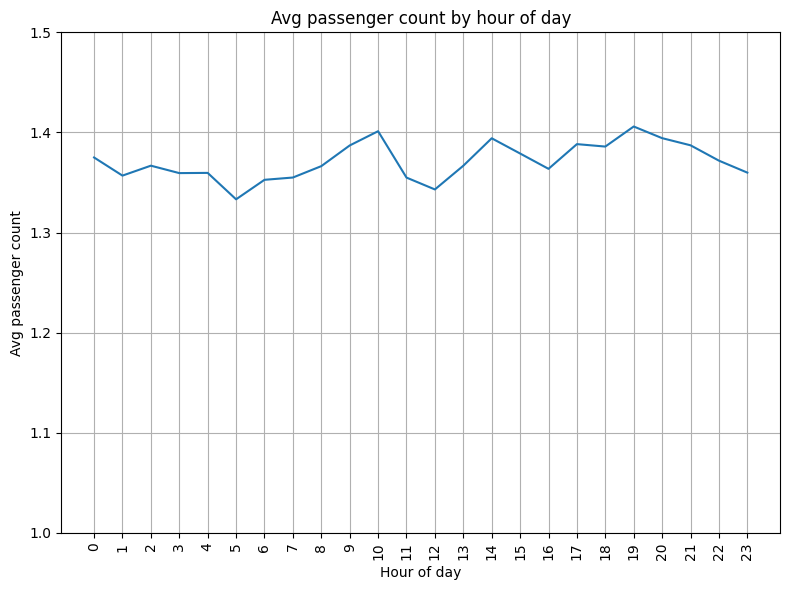


,=============================
,
, Averaged passenger count is  higher toward end of the week and specially on Saturday and Sunday  
,
,               avg_passenger_count
,days_of_week                     
,Monday                   1.350275
,Tuesday                  1.321591
,Wednesday                1.318623
,Thursday                 1.334373
,Friday                   1.394813
,Saturday                 1.477517
,Sunday                   1.458523 
,


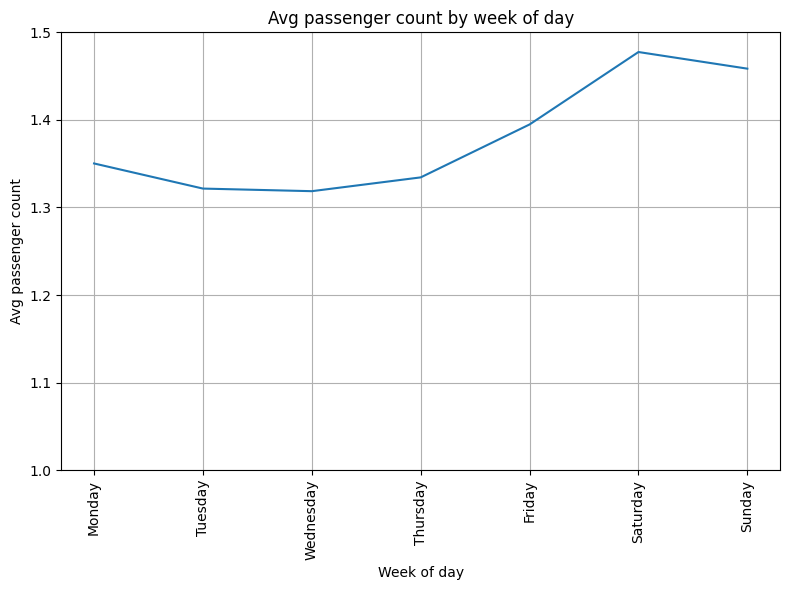

In [155]:
# See how passenger count varies across hours and days


### Variation of passenger count across hours
Avg_variation_of_passenger_count_across_hours = df1_14.groupby(['Pickup_hour']).agg(avg_passenger_count = ('passenger_count','mean'))


print('\033[1m Averaged passenger count across hours show peak at 10, 14 and evening hours of the day \033[0m \n\n',Avg_variation_of_passenger_count_across_hours, '\n\n')

plt.figure(figsize=(8, 6))

# Daily trends
plt.plot(Avg_variation_of_passenger_count_across_hours.index, Avg_variation_of_passenger_count_across_hours.avg_passenger_count)

# Plot formatting
plt.title('Avg passenger count by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Avg passenger count')
plt.grid(True)
plt.ylim(1,1.5)
plt.xticks(range(0, 24))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print('\n=============================\n')

### Variation of passenger count across days of the week.

Avg_variation_of_passenger_count_across_days_of_week = df1_14.groupby(['days_of_week']).agg(avg_passenger_count = ('passenger_count','mean')).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
Avg_variation_of_passenger_count_across_days_of_week

print('\033[1m Averaged passenger count is  higher toward end of the week and specially on Saturday and Sunday \033[0m \n\n',Avg_variation_of_passenger_count_across_days_of_week, '\n')

plt.figure(figsize=(8, 6))

# Daily trends
plt.plot(Avg_variation_of_passenger_count_across_days_of_week.index, Avg_variation_of_passenger_count_across_days_of_week.avg_passenger_count)

# Plot formatting
plt.title('Avg passenger count by week of day')
plt.xlabel('Week of day')
plt.ylabel('Avg passenger count')
plt.grid(True)
plt.ylim(1,1.5)
#plt.xticks(range(0, 24))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


**3.2.15** 
Analyse the variation of passenger counts across zones

variantion across zones 
,
,                                   zone  avg_passenger_count
,148                Ocean Parkway South                  6.0
,39                  Claremont/Bathgate                  5.0
,209             West Farms/Bronx River                  5.0
,3              Arrochar/Fort Wadsworth                  3.0
,84                       Fresh Meadows             2.666667
,..                                 ...                  ...
,197  University Heights/Morris Heights                  1.0
,68   East New York/Pennsylvania Avenue                  1.0
,173       Schuylerville/Edgewater Park                  1.0
,31                     Cambria Heights                  1.0
,103                        Hunts Point                  1.0
,
,[224 rows x 2 columns] 
,
,
,There are fewer number of outlier beyond upper whisker in zone based analysis of averaged passenger counts 
,


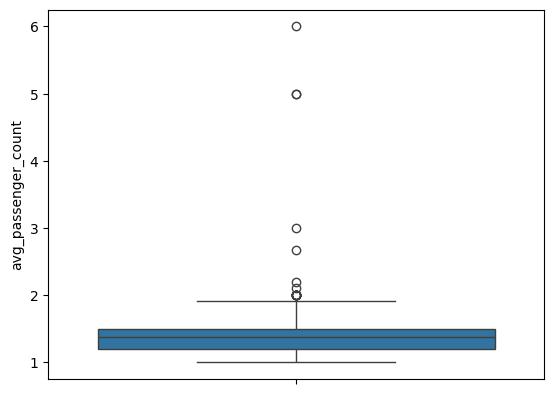

,avg_passenger_count
count,224.0
mean,1.43196
std,0.5472
min,1.0
25%,1.2
50%,1.370054
75%,1.5
max,6.0


In [157]:
# How does passenger count vary across zones

Avg_variation_of_passenger_count_across_zones = df1_14.groupby(['PULocationID']).agg(avg_passenger_count = ('passenger_count','mean'))
Avg_variation_of_passenger_count_across_zones

Avg_variation_of_passenger_count_across_zone_name = pd.merge(Avg_variation_of_passenger_count_across_zones,zones[['LocationID','zone']], how='inner', left_on = 'PULocationID', right_on ='LocationID')[['zone','avg_passenger_count']]
Avg_variation_of_passenger_count_across_zone_name = Avg_variation_of_passenger_count_across_zone_name.sort_values('avg_passenger_count', ascending = False)

print('\033[1mvariantion across zones\033[0m \n\n',Avg_variation_of_passenger_count_across_zone_name, '\n\n') 

print('\033[1mThere are fewer number of outlier beyond upper whisker in zone based analysis of averaged passenger counts\033[0m \n')
sns.boxplot(Avg_variation_of_passenger_count_across_zone_name.avg_passenger_count)
plt.show()

Avg_variation_of_passenger_count_across_zone_name.describe()


Variantion in zones with trips 
,                         Pickup_zone        Dropoff_zone  avg_passenger_count
,3367                       Flushing   LaGuardia Airport                  6.0
,10335         Upper West Side North       College Point                  6.0
,2390                  East Elmhurst  Woodlawn/Wakefield                  6.0
,6028            Little Italy/NoLiTa           Rego Park                  6.0
,3455                   Forest Hills       Cypress Hills                  6.0
,...                             ...                 ...                  ...
,2739                   East Village             Midwood                  1.0
,2741                   East Village  Morrisania/Melrose                  1.0
,2744                   East Village  Murray Hill-Queens                  1.0
,8014   Penn Station/Madison Sq West           Laurelton                  1.0
,8330                      Ridgewood            Glendale                  1.0
,
,[11647 rows x 3 columns] 
,


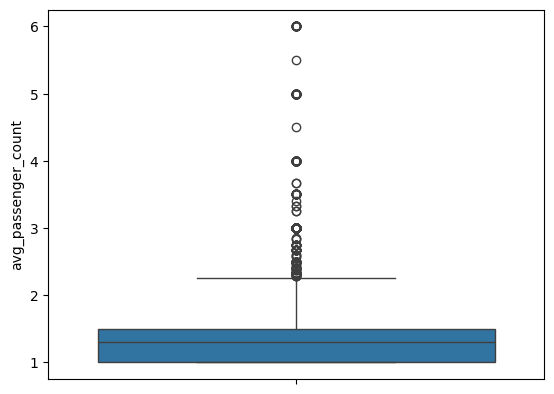

,avg_passenger_count
count,11647.0
mean,1.387184
std,0.548733
min,1.0
25%,1.0
50%,1.309302
75%,1.5
max,6.0


In [158]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
Avg_variation_of_passenger_count_across_zones_trip = df1_14.groupby(['PULocationID','DOLocationID']).agg(avg_passenger_count = ('passenger_count','mean')).reset_index()
Avg_variation_of_passenger_count_across_zones_trip

Avg_variation_of_passenger_count_across_zone_name_trip_pickup_map = pd.merge(Avg_variation_of_passenger_count_across_zones_trip,zones[['LocationID','zone']], how='inner', left_on = 'PULocationID', right_on ='LocationID').drop_duplicates()
Avg_variation_of_passenger_count_across_zone_name_trip_pickup_map.rename(columns = {'zone' : 'Pickup_zone'}, inplace = True)
Avg_variation_of_passenger_count_across_zone_name_trip_pickup_map

Avg_variation_of_passenger_count_across_zone_name_trip_dropoff_map = pd.merge(Avg_variation_of_passenger_count_across_zone_name_trip_pickup_map,zones[['LocationID','zone']], how='inner', left_on = 'DOLocationID', right_on ='LocationID').drop_duplicates()
Avg_variation_of_passenger_count_across_zone_name_trip_dropoff_map.rename(columns = {'zone' : 'Dropoff_zone'}, inplace = True)
Avg_variation_of_passenger_count_across_zone_name_trip_dropoff_map.columns

variation_in_zones_with_trips = Avg_variation_of_passenger_count_across_zone_name_trip_dropoff_map[['Pickup_zone', 'Dropoff_zone','avg_passenger_count']].drop_duplicates().sort_values('avg_passenger_count', ascending = False)
variation_in_zones_with_trips 
print('\033[1mVariantion in zones with trips\033[0m \n',variation_in_zones_with_trips,'\n') 

#variantion_in_zones_with_trips.avg_passenger_count.plot.box()

print('\033[1mThere are too many number of outlier beyond upper whisker in zone_with_trip based analysis of averaged passenger counts and the lower whisker can not be seen\033[0m \n')

sns.boxplot(variation_in_zones_with_trips.avg_passenger_count)
plt.show()

variation_in_zones_with_trips.describe()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** 
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [161]:
# How often is each surcharge applied?
pd.reset_option('display.max_columns')
print('\033[1mFrequency(%) of different charges that are applied are:\033[0m \n\n',(df1_14[['extra','mta_tax','improvement_surcharge','congestion_surcharge','Airport_Fee']] > 0).sum()/df1_14.shape[0]*100,'\n\n')

#creating a 'surcharge/Extra' column that include (extra + mta_tax + improvement_surcharge + congestion_surcharge + Airport_Fee)
df1_14['Surcharge/Extra'] = df1_14['extra']+df1_14['mta_tax']+df1_14['improvement_surcharge']+df1_14['congestion_surcharge'] + df1_14['Airport_Fee']

surcharge_extra_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_Fee','Surcharge/Extra']

for col in surcharge_extra_cols:
    df1_14[col + '_applied'] = df1_14[col].apply(lambda x: 1 if x > 0 else 0)


Pickup_zone_surcharge_freq = (df1_14.groupby('PULocationID')[['extra_applied', 'mta_tax_applied', 'improvement_surcharge_applied', 'congestion_surcharge_applied', 'Airport_Fee_applied','Surcharge/Extra_applied']].mean()*100).reset_index()
print('\033[1mFrequency(%) of different charges (Surcharge/Extra) that are applied by pick up zone (pick up location) :\033[0m \n\n',Pickup_zone_surcharge_freq)

## Checking if Surcharge/ Extra charge is paid all the time (100%)
print('Frequency (%) of Pick up zone which pays Surcharge/Extra at all the time ',(Pickup_zone_surcharge_freq['Surcharge/Extra_applied'] == 100).sum()/Pickup_zone_surcharge_freq.shape[0]*100, '\n======================\n')


Dropoff_zone_surcharge_freq = (df1_14.groupby('DOLocationID')[['extra_applied', 'mta_tax_applied', 'improvement_surcharge_applied', 'congestion_surcharge_applied', 'Airport_Fee_applied','Surcharge/Extra_applied']].mean()*100).reset_index()

print('\033[1mFrequency (%) of different charges that are applied by drop-off zone (dropoff location) :\033[0m \n\n',Dropoff_zone_surcharge_freq,'\n\n')

## Checking if Surcharge/ Extra charge is paid all the time (100%)
print('Frequnecy (%) of Drop-off zone which pays Surcharge/Extra at all the time ',(Dropoff_zone_surcharge_freq['Surcharge/Extra_applied'] == 100).sum()/Dropoff_zone_surcharge_freq.shape[0]*100, '\n=========================\n')

Hourly_surcharge_freq = (df1_14.groupby('Pickup_hour')[['extra_applied', 'mta_tax_applied', 'improvement_surcharge_applied', 'congestion_surcharge_applied', 'Airport_Fee_applied','Surcharge/Extra_applied']].mean()*100).reset_index()

print('\033[1mFrequency(%) of different charges that are applied hourly (Pick up hour) :\033[0m \n\n',Hourly_surcharge_freq,'\n\n')

## Checking if Surcharge/ Extra charge is paid all the time (100%)
print('Frequnecy (%) based on hourly travel which pays Surcharge/Extra at all the time ',(Hourly_surcharge_freq['Surcharge/Extra_applied'] == 100).sum()/Hourly_surcharge_freq.shape[0]*100, '\n=========================\n')




Frequency(%) of different charges that are applied are: 
,
, extra                    63.042595
,mta_tax                  99.440599
,improvement_surcharge    99.998985
,congestion_surcharge     95.085332
,Airport_Fee               8.278836
,dtype: float64 
,
,
,Frequency(%) of different charges (Surcharge/Extra) that are applied by pick up zone (pick up location) : 
,
,      PULocationID  extra_applied  mta_tax_applied  \
,0               1      11.428571        17.142857   
,1               2       0.000000       100.000000   
,2               4      86.294416        99.782451   
,3               6     100.000000         0.000000   
,4               7      50.996016        98.007968   
,..            ...            ...              ...   
,218           258      50.000000        50.000000   
,219           260      40.776699        86.407767   
,220           261      57.634314        98.623920   
,221           262      48.128876        99.852833   
,222           263      58.567216 

## **4** Conclusion


### **4.1** Final Insights and Recommendations


Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** 
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [165]:
'''
1. Avoid/Deconjesting routes (PUlocation-DUlocation) in particular hours where average speed of very slow. So that taxis are not held up in traffic zone.
2. Keep ample amount of taxi's deployed during busiest hour of day for operational efficiency, to meet the demand. 
Demand keeps peaking from morning to evening time. But keeping ample number of taxis deployed in busiest hours which start from 3pm to 7pm will be key for operational efficiencies. 
3. Understanding the pattern of taxi requirement and then keeping the zones/hours well staffed with Taxis will help. Example - During week days, the peak hour is from noon to late evening (8pm). 
During weekends peak hour varies. Its at 10, 14, 18 and 21 hour of the day. Hence, understanding these patterns and having good number of taxis available will help.
4. Understanding the zone with high demand will help meet the operational efficiencies.
'''


"\n1. Avoid/Deconjesting routes (PUlocation-DUlocation) in particular hours where average speed of very slow. So that taxis are not held up in traffic zone.\n2. Keep ample amount of taxi's deployed during busiest hour of day for operational efficiency, to meet the demand. \nDemand keeps peaking from morning to evening time. But keeping ample number of taxis deployed in busiest hours which start from 3pm to 7pm will be key for operational efficiencies. \n3. Understanding the pattern of taxi requirement and then keeping the zones/hours well staffed with Taxis will help. Example - During week days, the peak hour is from noon to late evening (8pm). \nDuring weekends peak hour varies. Its at 10, 14, 18 and 21 hour of the day. Hence, understanding these patterns and having good number of taxis available will help.\n4. Understanding the zone with high demand will help meet the operational efficiencies.\n"

**4.1.2** 

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [167]:
'''
Below are the strategically positioning of cabs across different zones to make best use of insights uncovered. 
The positioning should be dependent on below factor:
1. High pickup zones.
2. Identify high drop-off zones and quickly reposition them to high pickup zones.
3. Looked for zones which have high drop-off as well high pickup. This strategy will help auto position the taxis.
4. Look for zones with high pick/drop-off ratio. Position taxis around Airports, business park/Upper East Side which have higher pickups.
5. Position taxis in zones with active night life during nighttime hours.


'''

'\nBelow are the strategically positioning of cabs across different zones to make best use of insights uncovered. \nThe positioning should be dependent on below factor:\n1. High pickup zones.\n2. Identify high drop-off zones and quickly reposition them to high pickup zones.\n3. Looked for zones which have high drop-off as well high pickup. This strategy will help auto position the taxis.\n4. Look for zones with high pick/drop-off ratio. Position taxis around Airports, business park/Upper East Side which have higher pickups.\n5. Position taxis in zones with active night life during nighttime hours.\n\n\n'

**4.1.3** 
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [169]:
'''
Pricing strategy to maximize revenue while maintaining competitive rates with other vendors:-

1. Time based dynamic faring - Morning and evening are rush hour and hence having slightly higher fair or additional rush surcharge will boost the pricing.
2. Having additional charge for more number of passenger_counts in a trip will boost the revenue.
3. Having slightly higher charge for more than 2 mile distance_trip will boost the revenue.
4. Having slightly higher charges on weekends will help.
5. Enhancing the charges from VenorID-1 still keeping it lesser than VendorID-2 will greatly boost the revenue.

'''

'\nPricing strategy to maximize revenue while maintaining competitive rates with other vendors:-\n\n1. Time based dynamic faring - Morning and evening are rush hour and hence having slightly higher fair or additional rush surcharge will boost the pricing.\n2. Having additional charge for more number of passenger_counts in a trip will boost the revenue.\n3. Having slightly higher charge for more than 2 mile distance_trip will boost the revenue.\n4. Having slightly higher charges on weekends will help.\n5. Enhancing the charges from VenorID-1 still keeping it lesser than VendorID-2 will greatly boost the revenue.\n\n'